In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import re

### Auxiliary functions

In [2]:
def format_equation(str_equ, exp = 'x', var = 'x'):
    strOut = re.sub(r"{}".format(var), "({})".format(var), str_equ)
    strOut = re.sub(r"(?<=[A-Za-z0-9\)])(\({}\))".format(var), "*({})".format(var), strOut)
    strOut = re.sub(r"(?<=[0-9])\(", "*(", strOut)
    strOut = re.sub(r"(\^\({}\))".format(var), "**({})".format(var), strOut)
    strOut = re.sub(r"(\({}\))".format(var), "({})".format(exp), strOut)
    strOut = re.sub(r"\^", "**", strOut)
    
    strOut = re.sub(r"e", "math.e", strOut)
    strOut = re.sub(r"pi", "math.pi", strOut)
    strOut = re.sub(r"sin", "math.sin", strOut)
    strOut = re.sub(r"cos", "math.cos", strOut)
    strOut = re.sub(r"tan", "math.tan", strOut)
    strOut = re.sub(r"(?<=[A-Za-z0-9\)])(math.)", "*math.", strOut)
    return strOut

In [3]:
def format_secondVar(str_equ, var):
    strOut = re.sub(r"(?<=[A-Za-z0-9\)])({})".format(var), "*({})".format(var), str_equ)
    return strOut

In [4]:
#format_equation("2x^5+ 3x + x^2 + e^x + 3xy + 3sin(y) - 4cos(x) + 100(x + y)", 'x + h', 'y')
#format_equation("1/2x^TQx + c^Tx", 'x + h', 'x')

In [5]:
#format_secondVar("3x^4 - 2x^3y - 4x^2y^2 + 5xy^3 + y^4", 'x')

In [6]:
def evaluate_Fx(str_equ, x):
    x = float(x)
    strOut = format_equation(str_equ, 'x')
    result = eval(strOut)
    return result

In [7]:
def finite_derivative(str_equ, x, h):
    x = float(x)
    h = float(h)
    f1 = f2 = f3 = '(' +  str_equ + ')'
    
    f1 = format_equation(f1, 'x + 2*h')
    f2 = format_equation(f2, 'x + h')
    f3 = format_equation(f3, 'x')
      
    strOut = '(' + f1 + ' - 4 * ' + f2 + ' + 3 *' + f3 + ')' + ' / (2 * h)'
    result = eval(strOut)
    return result

## Lab1 Functions (derivatives)

#### R1 functions

In [8]:
def center_finite_derivative(str_equ, x, h):
    x = float(x)
    h = float(h)
    f1 = f2 = '(' +  str_equ + ')'
    
    f1 = format_equation(f1, 'x + h')
    f2 = format_equation(f2, 'x - h')
      
    strOut = '(' + f1 + ' - ' + f2 + ')' + ' / (2 * h)'
    result = eval(strOut)
    return np.array(result, dtype = np.float32)

In [9]:
def progressive_finite_derivative(str_equ, x, h):
    x = float(x)
    h = float(h)
    f1 = f2 = f3 = '(' +  str_equ + ')'
   
    f1 = format_equation(f1, 'x')
    f2 = format_equation(f2, 'x + h')
    f3 = format_equation(f3, 'x + 2*h')
      
    strOut = '( -3 * ' + f1 + ' + 4 * ' + f2 + ' - ' + f3 + ')' + ' / (2 * h)'
    result = eval(strOut)
    return np.array(result, dtype = np.float32)

In [10]:
def center_finite_derivative_2(str_equ, x, h):
    x = float(x)
    h = float(h)
    f1 = f2 = f3 = f4 = '(' +  str_equ + ')'
    
    f1 = format_equation(f1, 'x + h')
    f2 = format_equation(f2, 'x - h')   
    f3 = format_equation(f3, 'x + 2*h')   
    f4 = format_equation(f4, 'x - 2*h')   
      
    strOut = '(' + f4 + ' - 8 * ' + f2 + ' + 8 * ' + f1 + ' - ' + f3 + ')' + ' / (12 * h)'
    result = eval(strOut)
    return np.array(result, dtype = np.float32)

In [11]:
#center_finite_derivative("2x^5 - 3", 1, 2)

In [12]:
#progressive_finite_derivative("2x^5 - 3", 1, 2)

In [13]:
#center_finite_derivative_2("2x^5 - 3", 1, 2)

#### R2 Functions

In [14]:
def center_finite_derivative_r2(str_equ, p, h):
    x = float(p[0])
    y = float(p[1])
    h = float(h)
    
    str_parciales = []
    for var in ['x', 'y']:
        #equ = str_equ.replace('y', '*(y)') if var == 'x' else str_equ.replace('x', '*(x)')
        equ = format_secondVar(str_equ, 'y') if var == 'x' else format_secondVar(str_equ, 'x')
        f1 = f2 = '(' +  equ + ')'
 
        f1 = format_equation(f1, var + ' + h', var)   
        f2 = format_equation(f2, var + ' - h', var)   
      
        strOut = '(' + f1 + ' - ' + f2 + ')' + ' / (2 * h)'
        str_parciales.append(strOut)
    
    #[print(parcial) for parcial in str_parciales]
    result = [eval(parcial, {}, {'x': x, 'y': y, 'h': h}) for parcial in str_parciales]
    return np.array(result, dtype = np.float32)

In [15]:
def progressive_finite_derivative_r2(str_equ, p, h):
    x = float(p[0])
    y = float(p[1])
    h = float(h)
     
    str_parciales = []
    for var in ['x', 'y']:
        equ = format_secondVar(str_equ, 'y') if var == 'x' else format_secondVar(str_equ, 'x')
        f1 = f2 = f3 = '(' +  equ + ')'
   
        f1 = format_equation(f1, var, var)   
        f2 = format_equation(f2, var + '+ h', var)   
        f3 = format_equation(f3, var + ' + 2*h', var)   
        
        strOut = '(-3 * ' + f1 + ' + 4 * ' + f2 + ' - ' + f3 + ')' + ' / (2 * h)'
        str_parciales.append(strOut)
        
        
    #[print(parcial) for parcial in str_parciales]
    result = [eval(parcial, {}, {'x': x, 'y': y, 'h': h}) for parcial in str_parciales]
    return np.array(result, dtype = np.float32)

In [16]:
def center_finite_derivative_2_r2(str_equ, p, h):
    x = float(p[0])
    y = float(p[1])
    h = float(h)
     
    str_parciales = []
    for var in ['x', 'y']:
        equ = format_secondVar(str_equ, 'y') if var == 'x' else format_secondVar(str_equ, 'x')
        f1 = f2 = f3 = f4 = '(' +  equ + ')'
    
        f1 = format_equation(f1, var + ' + h', var)   
        f2 = format_equation(f2, var + ' - h', var)   
        f3 = format_equation(f3, var + ' + 2*h', var)   
        f4 = format_equation(f4, var + ' - 2*h', var)   
        
        strOut = '(' + f4 + ' - 8 * ' + f2 + ' + 8 * ' + f1 + ' - ' + f3 + ')' + ' / (12 * h)'
        str_parciales.append(strOut)     
    
    #[print(parcial) for parcial in str_parciales]
    result = [eval(parcial, {}, {'x': x, 'y': y, 'h': h}) for parcial in str_parciales]
    return np.array(result, dtype = np.float32)

In [17]:
#format_secondVar("3x^4 - 2x^3y - 4x^2y^2 + 5xy^3 + 2y^4", 'x')

In [18]:
#center_finite_derivative_r2("3x^4 - 2x^3y - 4x^2y^2 + 5xy^3 + 2y^4", ['2', '4'], 0.001)
#progressive_finite_derivative_r2("3x^4 - 2x^3y - 4x^2y^2 + 5xy^3 + 2y^4", ['2', '4'], 0.001)
#center_finite_derivative_2_r2("3x^4 - 2x^3y - 4x^2y^2 + 5xy^3 + 2y^4", ['2', '3'], 0.001)

### Any R Space Derivative Function

In [19]:
def center_finite_derivative_2_full(str_equ, p, h):
    x = np.array(p, dtype = np.float32)
    all_vars = ['x_{}'.format(i) for i in range(0, len(x))]
    vars_dict = {var: x_val for (var, x_val) in zip(all_vars, x)}
    vars_dict['h'] = h
    
    str_parciales = []
    equ = str_equ
    for i in range(0, len(x)):
        var = 'x_{}'.format(i)
        for incognita in all_vars:
            if incognita != var:
                equ = format_secondVar(equ, incognita)
        f1 = f2 = f3 = f4 = '(' +  equ + ')'
    
        f1 = format_equation(f1, var + ' + h', var)   
        f2 = format_equation(f2, var + ' - h', var)   
        f3 = format_equation(f3, var + ' + 2*h', var)   
        f4 = format_equation(f4, var + ' - 2*h', var)   
        
        strOut = '(' + f4 + ' - 8 * ' + f2 + ' + 8 * ' + f1 + ' - ' + f3 + ')' + ' / (12 * h)'
        str_parciales.append(strOut)     
    
    #[print(parcial) for parcial in str_parciales]
    result = [eval(parcial, {}, vars_dict) for parcial in str_parciales]
    return np.array(result, dtype = np.float32)

In [20]:
#center_finite_derivative_2_full("3x_0^4 - 2x_1^3 - 4x_2^2x_1 + x_0", ['1', '2', '3'], 0.001)

## Lab2 Functions (ceros)

In [21]:
def metodo_biseccion(str_equ, interval, k_max, epsilon):
    k = 0
    a = float(interval[0])
    b = float(interval[1])
    error = float('inf')
    data = {'Iter': [], 'Xn': [], 'Error': []}
    
    x_k = (a + b) / 2    
    while k < k_max and error > epsilon:
        Fa = evaluate_Fx(str_equ, a)
        Fx_k = evaluate_Fx(str_equ, x_k)
        if (Fa * Fx_k) < 0:
            b = x_k
        else:
            a = x_k
        
        k += 1
        x_k = (a + b) / 2
        error = abs(Fx_k)
        
        data['Iter'].append(k)
        data['Xn'].append(x_k)
        data['Error'].append(error)
        
    results = pd.DataFrame(data)
    return results

In [22]:
def metodo_newton(str_equ, x_0, k_max, epsilon):
    k = 0
    x_k = x_0
    error = float('inf')
    data = {'Iter': [], 'Xn': [], 'Error': []}
    
    while k < k_max and error > epsilon:
        Fx_k = evaluate_Fx(str_equ, x_k)
        dev1_Fx_k = center_finite_derivative_2(str_equ, x_k, 0.00001)
        
        x_k1 = x_k - (Fx_k / dev1_Fx_k)
        x_k = x_k1
        k += 1
        error = abs(Fx_k)
        
        data['Iter'].append(k)
        data['Xn'].append(x_k)
        data['Error'].append(error)
        
    results = pd.DataFrame(data)
    return results

In [23]:
#equ = "3x^2 + 4x - 3"
#equ = "e^x + x^2"

#df = metodo_biseccion(equ, ['-4', '4'], 50, 0.001)
#df = metodo_newton(equ, 0.1, 50, 0.0001)
#df.tail()

## Lab3 Functions (GD)

In [24]:
def parseInput(x, reshape = False):
    if reshape:
        rows = len(x)
        x = np.array(x, dtype = 'float').reshape(rows, 1)
    else:
        x = np.array(x, dtype = 'float')

    return x

In [25]:
def getLearningRate(opt, k, gradient = None, Q = None, alpha = 0.001):
    if opt == 'Exacto':
        lr = (np.linalg.norm(gradient, 2)**2) / np.matmul(np.matmul(gradient.T, Q), gradient)
        lr = lr[0, 0]
    elif opt == 'Constante':
        lr = alpha
    elif opt == 'Variable':
        lr = 1/k
    else:
        lr = 1
        
    return lr

In [26]:
def gradient_descent_QP(x_0, Q, c, kmax, epsilon, lr_type, alpha = 0.001):
    k = 0
    x_k = parseInput(x_0, reshape = True)
    c = parseInput(c, reshape = True)
    Q = parseInput(Q)
    error = float('inf')
    data = {'Iter': [], 'Xn': [], 'Pk': [], 'Error': []}
      
    while k < kmax and error > epsilon:
        gradient = np.matmul(Q, x_k) + c
        lr = getLearningRate(lr_type, k + 1, gradient, Q, alpha)
        x_k1 = x_k - (lr * gradient)
        
        x_k = x_k1
        k += 1
        error = np.linalg.norm(gradient, 2)
        
        data['Iter'].append(k)
        data['Xn'].append(x_k)
        data['Pk'].append(-1 * gradient)
        data['Error'].append(error)     
  
    results = pd.DataFrame(data)
    return results

In [27]:
#First and second try
Q = np.array([[2, -1, 0], [-1, 2, -1], [0, -1, 2]])
c = np.array([1, 0 ,1]).reshape(3, 1)
#x_0 = np.array([3, 5, 7]).reshape(3, 1)
x_0 = np.array([-1, 2, -3])
epsilon = 0.000001
lr_type = ['Exacto', 'Constante', 'Variable']
N = 30

In [28]:
#data = gradient_descent_QP(x_0, Q, c, N, epsilon, lr_type[0], alpha = 0.001)
#data.tail()

In [29]:
def getRosenbrockGradient(x0):
    x = x0[0, 0]
    y = x0[1, 0]
    g1 = eval('400*(x**3) + 2*(x) - 400*(x)*(y) - 2', {}, {'x': x, 'y': y})
    g2 = eval('-200*(x**2) + 200*(y)', {}, {'x': x, 'y': y})
    gradient = np.array([g1, g2], dtype = 'float').reshape(2,1)
    
    return gradient

In [30]:
def rosenbrock_gd(x_0, kmax, epsilon, lr):
    k = 0
    x_k = parseInput(x_0, reshape = True)
    error = float('inf')
    data = {'Iter': [], 'Xn': [], 'Pk': [], 'Error': []}
      
    while k < kmax and error > epsilon:
        gradient = getRosenbrockGradient(x_k)
        x_k1 = x_k - (lr * gradient)

        x_k = x_k1
        k += 1
        error = np.linalg.norm(gradient, 2)
        
        data['Iter'].append(k)
        data['Xn'].append(x_k.round(7))
        data['Pk'].append(-1 * gradient.round(7))
        data['Error'].append(error.round(7))  
    
    results = pd.DataFrame(data)
    return results

In [31]:
#getRosenbrockGradient(np.array([30., 30.]).reshape(2,1))

In [32]:
#x_0 = np.array(['0', '0'])
#alpha = 0.05
#epsilon = 0.00000001
#N = 1000

In [33]:
#rosenbrock_gd(x_0, N, epsilon, alpha)

### Lab4 (GD Variants and Newton)

### GD Variants

In [34]:
d = 100 #columnas en el dataset
n = 1000 #observaciones
A = np.random.normal(0, 1, size = (n,d))
x_true = np.random.normal(0, 1, size = (d,1))
b = A.dot(x_true) + np.random.normal(0, 0.5, size = (n,1))

In [78]:
def computeGD(x_0, A, b, kmax, epsilon, lr, mb_size):
    k = 0
    x_k = x_0
    errors = []

    mat = np.hstack((A,b))
    while k < kmax:
        np.random.shuffle(mat) #in-place shuffle
        iters = A.shape[0] // mb_size
        for i in range(0, iters):
            start = i * mb_size
            end = (1+i) * mb_size
            A_mb = mat[start:end, :-1]
            b_mb = mat[start:end, -1]
            b_mb = np.expand_dims(b_mb, axis = 1)

            gradient = np.matmul(np.matmul(A_mb.T, A_mb), x_k) - np.matmul(A_mb.T, b_mb)
            x_k1 = x_k - (lr * gradient)
            x_k = x_k1

        k += 1
        error = np.linalg.norm(gradient, 2)
        errors.append(error)

    return errors

##### Parte 1 - Solucion Cerrada

In [35]:
def getCloseSolution(A, b):
    inverse = np.linalg.inv(np.matmul(A.T, A))
    x = np.matmul(np.matmul(inverse, A.T), b)
    return x

In [36]:
getCloseSolution(A, b)

array([[-1.42212128e+00],
       [ 6.87780781e-01],
       [ 2.72752312e-02],
       [-4.44708366e-01],
       [-8.77937371e-01],
       [-7.46751415e-01],
       [ 7.31798195e-01],
       [ 4.90495153e-01],
       [ 3.00486704e+00],
       [-6.10620280e-01],
       [ 4.11678835e-01],
       [-1.38076335e+00],
       [ 1.05045975e+00],
       [ 3.08521057e-01],
       [ 6.32483563e-01],
       [ 1.02871687e+00],
       [ 2.20269517e-01],
       [-1.39079183e+00],
       [-8.22371465e-01],
       [ 6.87442586e-02],
       [-1.15924683e+00],
       [ 4.19331853e-01],
       [-8.07645075e-01],
       [-3.63893002e-01],
       [ 1.85716376e-01],
       [ 1.72745022e+00],
       [ 9.48345710e-01],
       [-9.47816693e-01],
       [-7.76781129e-01],
       [ 1.51765478e+00],
       [ 3.70025465e-01],
       [-2.54991686e+00],
       [ 1.25694891e+00],
       [-2.47719060e+00],
       [-1.39724834e-01],
       [ 1.99148302e-02],
       [-1.58076657e+00],
       [ 9.11073886e-01],
       [ 1.7

##### Parte 2 - GD

In [83]:
lr_list = [0.00005, 0.0005, 0.0007]
x_0 = np.zeros_like(x_true)
kmax = 30

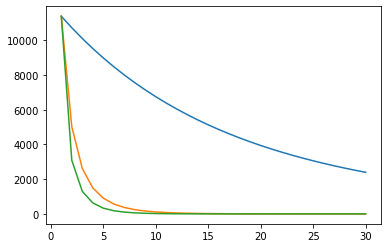

In [84]:
for lr in lr_list:
    errors = computeGD(x_0, A, b, kmax, epsilon, lr, A.shape[0])
    plt.plot(np.arange(1,kmax + 1), errors[:kmax])
plt.show()

##### Parte 3 - SGD

In [87]:
lr_list = [0.0005, 0.005, 0.01]
x_0 = np.zeros_like(x_true)
kmax = 1000
epsilon = 0.000001

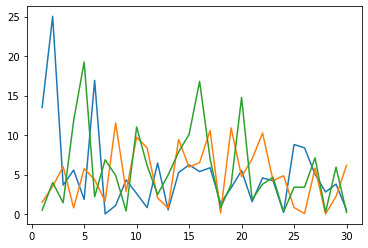

In [92]:
for lr in lr_list:
    errors = computeGD(x_0, A, b, kmax, epsilon, lr, 1)
    plt.plot(np.arange(1,31), errors[:30])
plt.show()

##### Parte 4 - MiniBatch-GD

In [90]:
lr_list = [0.0005, 0.005, 0.01]
mb_list = [25, 50, 100]
x_0 = np.zeros_like(x_true)
kmax = 1000

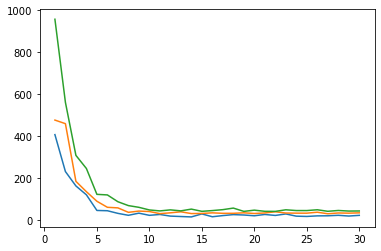

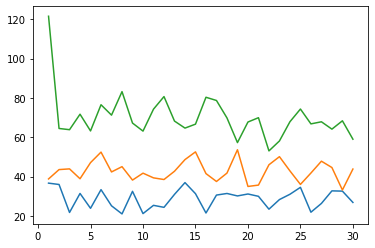

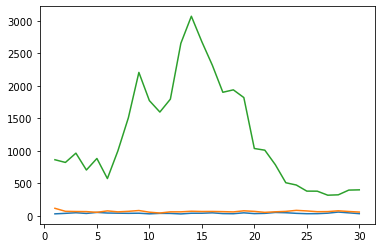

In [91]:
for lr in lr_list:
    for mb in mb_list:
        errors = computeGD(x_0, A, b, kmax, epsilon, lr, mb)
        plt.plot(np.arange(1,31), errors[:30])
    plt.show()

#### Metodo de Newton

##### Parte 1 - GD con Backtracking line search

In [136]:
def evalRosenbrockFunction(x0):
    x = x0[0, 0]
    y = x0[1, 0]
    rsb_function = '100*((y-x**2)**2) + (1 - x)**2'
    result = eval(rsb_function, {}, {'x': x, 'y': y})
    return result

In [137]:
def backTrackingLineSearch(x_0, lr, ro, c):
    x_k = x_0
    condition = True

    while condition:
        gradient = getRosenbrockGradient(x_k)
        x_k1 = x_k - (lr * gradient)

        fk_1 = evalRosenbrockFunction(x_k1)
        f_k = evalRosenbrockFunction(x_k)
        rhs = c * lr * np.matmul(gradient.T, -gradient)

        condition = (fk_1 > (f_k + rhs)) #the loop is the negated condition of the backtracking algorithm
        lr *= ro

    return lr

In [170]:
def rosenbrock_backtracking(x_0, kmax, epsilon, alpha, ro, c):
    k = 0
    x_k = parseInput(x_0, reshape = True)
    error = float('inf')
    data = {'Iter': [], 'Xn': [], 'Pk': [], 'Error': []}

    lr = backTrackingLineSearch(x_k, alpha, ro, c)
    while k < kmax and error > epsilon:
        gradient = getRosenbrockGradient(x_k)
        x_k1 = x_k - (lr * gradient)

        x_k = x_k1
        k += 1
        error = np.linalg.norm(gradient, 2)

        data['Iter'].append(k)
        data['Xn'].append(x_k.round(7))
        data['Pk'].append(-1 * gradient.round(7))
        data['Error'].append(error.round(7))

    results = pd.DataFrame(data)
    return results

In [168]:
x_array = [np.array(['0', '0']), np.array(['0.6', '0.6']), np.array(['-0.5', '1']), np.array(['-1.2', '1'])]
x_0 = x_array[1]
epsilon = 0.00000001
kmax = 1000

alpha = 1
ro = 0.5
c = 0.0001

In [169]:
df = rosenbrock_backtracking(x_0, kmax, epsilon, alpha, ro, c)
df.tail()

0.0009765625


,Iter,Xn,Pk,Error
995,996,"[[0.8376345], [0.7009165]]","[[0.0851817], [0.143105]]",0.166538
996,997,"[[0.8377177], [0.7010562]]","[[0.0851256], [0.143025]]",0.166441
997,998,"[[0.8378007], [0.7011957]]","[[0.0850696], [0.142945]]",0.166343
998,999,"[[0.8378838], [0.7013353]]","[[0.0850137], [0.142865]]",0.166246
999,1000,"[[0.8379667], [0.7014747]]","[[0.0849577], [0.1427852]]",0.166149


##### Parte 2 - Metodo de newton con Backtracking line search

In [171]:
def getRosenbrockHessian(x0):
    x = x0[0, 0]
    y = x0[1, 0]
    g1 = eval('1200*(x**2) - 400*(y) + 2', {}, {'x': x, 'y': y})
    g2 = eval('-400*(x)', {}, {'x': x})
    hessian = np.array([g1, g2, g2, 200], dtype = 'float').reshape(2,2)

    return hessian

In [196]:
def newton_optimization(x_0, kmax, epsilon, alpha, ro, c, lr_type = 'backtracking'):
    k = 0
    x_k = parseInput(x_0, reshape = True)
    error = float('inf')
    data = {'Iter': [], 'Xn': [], 'Pk': [], 'Error': []}

    if lr_type == 'backtracking':
        lr = backTrackingLineSearch(x_k, alpha, ro, c)
    else: #else it would be constant
        lr = alpha

    while k < kmax and error > epsilon:
        gradient = getRosenbrockGradient(x_k)
        hessian = getRosenbrockHessian(x_k)
        p_k = -1 * np.matmul(np.linalg.inv(hessian), gradient)
        x_k1 = x_k + (lr * p_k)

        x_k = x_k1
        k += 1
        error = np.linalg.norm(gradient, 2)

        data['Iter'].append(k)
        data['Xn'].append(x_k.round(7))
        data['Pk'].append(p_k.round(7))
        data['Error'].append(error.round(7))

    results = pd.DataFrame(data)
    return results

In [203]:
x_array = [np.array(['0', '0']), np.array(['0.6', '0.6']), np.array(['-0.5', '1']), np.array(['-1.2', '1'])]
x_0 = x_array[3]
epsilon = 0.00000001
kmax = 3000

alpha = 1
ro = 0.5
c = 0.0001

In [204]:
df = newton_optimization(x_0, kmax, epsilon, alpha, ro, c, 'const')
df.tail()

,Iter,Xn,Pk,Error
2,3,"[[0.7634297], [0.5828248]]","[[0.0003148], [3.7578586]]",1370.789849
3,4,"[[0.9999953], [0.9440273]]","[[0.2365656], [0.3612025]]",0.473110
4,5,"[[0.9999957], [0.9999914]]","[[4e-07], [0.0559641]]",25.027446
5,6,"[[1.0], [1.0]]","[[4.3e-06], [8.6e-06]]",0.000009
6,7,"[[1.0], [1.0]]","[[-0.0], [0.0]]",0.000000
